Hello all ! Welcome to google colab intro tutorial

**What is Google Colab ?**

Google Colab is a free cloud service which comes with pre installed machine learning frameworks like tensorflow and free gpus to run on

Index
1.   Running Basic Python code in Colab
1.   How to run commands in cells
2.   CPU and GPU configurations   
3.   How to mount google drive
4.   Run any ipython notebook from github on Colab
5.   A simple cusine classification problem based on ingredients



***Running Basic Python Code in Colab***

The cell below shows some python examples

In [0]:
x = 10

print(x)

y = 20

print(x + y)


***How to run shell commands ***

Inorder to run shell commands add ***!*** in front of the command

Example: **!ls** will list the contents of the folder

In [0]:
!ls

***Memory, CPU and GPU Configurations***

Memory - !cat /proc/meminfo

CPU - !cat /proc/cpuinfo

GPU 

        import tensorflow as tf
        tf.test.gpu_device_name()


In [0]:
!cat /proc/meminfo


In [0]:
!cat /proc/cpuinfo

In [10]:
import tensorflow as tf
from tensorflow.python.client import device_lib

tf.test.gpu_device_name()
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18414201210285949547, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281553818
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5937062516959101879
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

***How to mount google drive***

The example below shows how to mount your Google Drive in your virtual machine using an authorization code, and shows a couple of ways to write & read files there. Once executed, observe the new file (foo.txt) is visible in https://drive.google.com/

Note this only supports reading and writing files; to programmatically change sharing settings etc use one of the other options below.



Please refer this link to know how to load files into Colab from local file system, google drive in three different forms
* Using the native REST API;
* Using a wrapper around the API such as PyDrive; or
* Mounting your Google Drive in the runtime's virtual machine.
* From Google Cloud Storage bucket

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

In [0]:
!pip3 install gensim


In [0]:
import os
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
!ls /content/gdrive/My\ Drive/cusines\ dataset/




sample_submission.csv  test.json  test.json.zip  train.json  train.json.zip


In [0]:
!cd /content/gdrive/My\ Drive/cusines\ dataset/


In [9]:
!ls


gdrive	sample_data


In [10]:
!ls /


bin	    content  etc   lib64  opt	run   sys    usr
boot	    datalab  home  media  proc	sbin  tmp    var
colabtools  dev      lib   mnt	  root	srv   tools


In [0]:
!cd /content

In [13]:
!ls


gdrive	sample_data


In [0]:
!cd gdrive

In [15]:
!ls


gdrive	sample_data


In [0]:
path = '/content/gdrive/My Drive/cusines dataset/'

In [0]:
from os import listdir

In [0]:
l = [f for f in listdir(path)]

In [23]:
print(l)

['sample_submission.csv', 'test.json', 'train.json', 'train.json.zip', 'test.json.zip']


In [0]:
data = pd.read_json(path+'train.json')
test = pd.read_json(path+'test.json')


In [29]:
print('Training data shape: {}'.format(data.shape))
print('Test data shape: {}'.format(test.shape))

Training data shape: (39774, 3)
Test data shape: (9944, 2)


In [0]:
target = data.cuisine

In [0]:
data['ingredient_count'] = data.ingredients.apply(lambda x: len(x))
def flatten_lists(lst):
    """Remove nested lists."""
    return [item for sublist in lst for item in sublist]

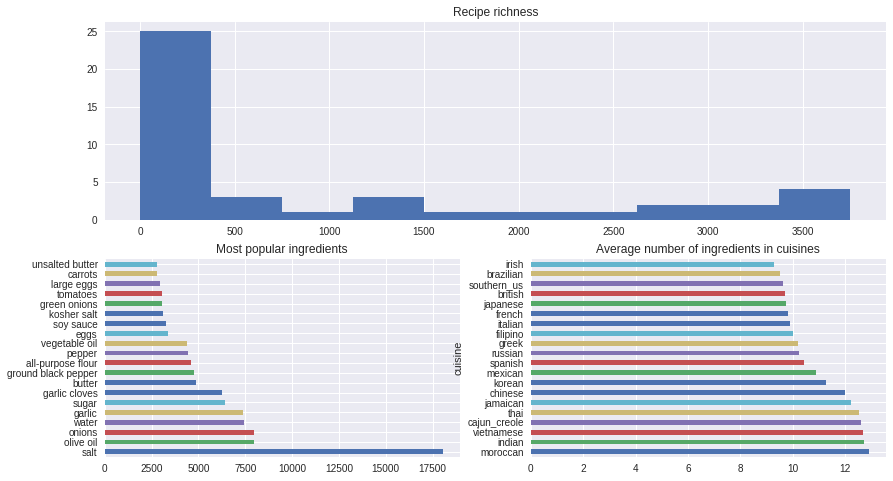

In [32]:
f = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(gs[0, :])
data.ingredient_count.value_counts().hist(ax=ax1)
ax1.set_title('Recipe richness', fontsize=12)

ax2 = plt.subplot(gs[1, 0])
pd.Series(flatten_lists(list(data['ingredients']))).value_counts()[:20].plot(kind='barh', ax=ax2)
ax2.set_title('Most popular ingredients', fontsize=12)

ax3 = plt.subplot(gs[1, 1])
data.groupby('cuisine').mean()['ingredient_count'].sort_values(ascending=False).plot(kind='barh', ax=ax3)
ax3.set_title('Average number of ingredients in cuisines', fontsize=12)

plt.show()

In [0]:
w2v = gensim.models.Word2Vec(list(data.ingredients), size=350, window=10, min_count=2, iter=20)


In [34]:
w2v.most_similar(['meat'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('beef', 0.742953896522522),
 ('pork chops', 0.6455117464065552),
 ('pork', 0.6415594816207886),
 ('ground beef', 0.6282061338424683),
 ('beef brisket', 0.6225401163101196),
 ('broth', 0.6106168031692505),
 ('chicken', 0.6102498769760132),
 ('pork loin', 0.6004678010940552),
 ('beef tongue', 0.5827422142028809),
 ('pork shoulder', 0.5751793384552002)]

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
w2v.most_similar(['chicken'])

[('chicken breasts', 0.7657210826873779),
 ('chicken thighs', 0.7201263904571533),
 ('boneless chicken breast', 0.713852047920227),
 ('boneless skinless chicken breasts', 0.6848801970481873),
 ('cooked chicken', 0.6593297123908997),
 ('boneless chicken skinless thigh', 0.638907253742218),
 ('chicken pieces', 0.6367906332015991),
 ('meat', 0.6102498769760132),
 ('chicken meat', 0.5974780321121216),
 ('chicken legs', 0.5957319736480713)]